<a href="https://colab.research.google.com/github/Mohammed-asaad-AI/KMeans-Clustering-Project/blob/main/KMeans-Ckustering-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans Clustering Project


# **Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns
import warnings

style.use('ggplot')
sns.set(style="whitegrid")


# **--- 1. Manual KMeans on 2D points ---**


In [2]:

def manual_kmeans():
    x = np.array ([
        [1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11],
        [1,3], [8,9], [0,3], [5,4], [6,4]
    ])

    plt.scatter(x[:,0], x[:,1], s=150)
    plt.title("Raw Data - Manual KMeans")
    plt.show()

    class K_means:
        def __init__(self, k=2, tol=0.001, max_iter=300):
            self.k = k
            self.tol = tol
            self.max_iter = max_iter

        def fit(self, data):
            if len(data) < self.k:
                raise ValueError("Number of points is less than k")

            self.centroids = {}
            for i in range(self.k):
                self.centroids[i] = data[i]

            for _ in range(self.max_iter):
                self.classifications = {i: [] for i in range(self.k)}

                for featureset in data:
                    distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                    classification = distances.index(min(distances))
                    self.classifications[classification].append(featureset)

                prev_centroids = dict(self.centroids)

                for classification in self.classifications:
                    self.centroids[classification] = np.average(self.classifications[classification], axis=0)

                optimized = True
                for c in self.centroids:
                    original = prev_centroids[c]
                    current = self.centroids[c]
                    change = np.sum(np.abs((current - original) / original) * 100.0)
                    if change > self.tol:
                        optimized = False

                if optimized:
                    break

        def predict(self, data):
            distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
            return distances.index(min(distances))

    clf = K_means()
    clf.fit(x)

    colors = ["g", "r", "c", "b", "k", "y"]

    for centroid in clf.centroids:
        plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                    marker="o", color="k", s=150, linewidths=5)

    for classification in clf.classifications:
        color = colors[classification]
        for featureset in clf.classifications[classification]:
            plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

    plt.title("Manual KMeans Result")
    plt.show()


# **--- 2. Using sklearn KMeans on 2D data ---**


In [3]:

def sklearn_kmeans_2d():
    x = np.array ([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])

    plt.scatter(x[:,0], x[:,1], s=150)
    plt.title("Raw Data - sklearn")
    plt.show()

    clf = KMeans(n_clusters=2, random_state=42)
    clf.fit(x)

    centroids = clf.cluster_centers_
    labels = clf.labels_

    print("Centroids:", centroids)
    print("Labels:", labels)
    print("Silhouette Score:", silhouette_score(x, labels))

    plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', s=150)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')
    plt.title("sklearn KMeans Result")
    plt.show()

# **--- 3. Titanic Dataset Clustering with KMeans ---**


In [4]:

def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        if df[column].dtype not in [np.int64, np.float64]:
            text_digit_vals = {}

            def convert_to_int(val):
                if pd.isnull(val):
                    return np.nan
                return text_digit_vals[val]

            unique_elements = set(x for x in df[column].values if pd.notnull(x))
            for i, unique in enumerate(unique_elements):
                text_digit_vals[unique] = i

            df[column] = df[column].map(convert_to_int)

    return df

def titanic_kmeans():
    df = pd.read_excel('titanic.xls')
    df.drop(['body','name','boat'], axis=1, inplace=True)
    df['sex'] = df['sex'].map({'female': 0, 'male': 1})
    df = handle_non_numerical_data(df)
    df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)


#Visual analysis before clustering

    plt.figure(figsize=(10, 4))
    sns.countplot(x='survived', data=df)
    plt.title('Survival Distribution')
    plt.show()

    plt.figure(figsize=(10, 4))
    sns.histplot(df['age'], bins=30, kde=True)
    plt.title('Age Distribution')
    plt.show()

    plt.figure(figsize=(10, 4))
    sns.boxplot(x='survived', y='fare', data=df)
    plt.title('Fare vs Survival')
    plt.show()

# New analysis: survival by sex


    plt.figure(figsize=(10, 4))
    sns.countplot(x='sex', hue='survived', data=df)
    plt.title('Survival by Gender')
    plt.xticks([0,1], ['Female', 'Male'])
    plt.show()

# New analysis: survival by age group (child, adult)

    df['age_group'] = df['age'].apply(lambda x: 'child' if x < 16 else 'adult')
    plt.figure(figsize=(10, 4))
    sns.countplot(x='age_group', hue='survived', data=df)
    plt.title('Survival by Age Group')
    plt.show()

    print("\nAnalysis Insights:")
    print("- Females had significantly higher survival rates than males.")
    print("- Children under 16 had higher survival rates than adults.")
    print("- Passengers who paid higher fares had higher survival chances, possibly indicating higher class.")

    X = np.array(df.drop(['survived', 'age_group'], axis=1).astype(float))
    X = preprocessing.scale(X)
    y = np.array(df['survived'])

    clf = KMeans(n_clusters=2, random_state=42)
    clf.fit(X)

    correct = 0
    for i in range(len(X)):
        prediction = clf.predict([X[i]])
        if prediction[0] == y[i]:
            correct += 1

    accuracy = correct / len(X)
    flipped_accuracy = 1 - accuracy

    print("KMeans Titanic Accuracy (approx):", max(accuracy, flipped_accuracy))
    print("Silhouette Score:", silhouette_score(X, clf.labels_))


# Optional PCA visualization


    pca = PCA(n_components=2)
    reduced_X = pca.fit_transform(X)
    plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=clf.labels_, cmap='coolwarm', s=30)
    plt.title("Titanic Clustering (PCA Projection)")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.show()

# **Run all parts**



--- Manual KMeans ---


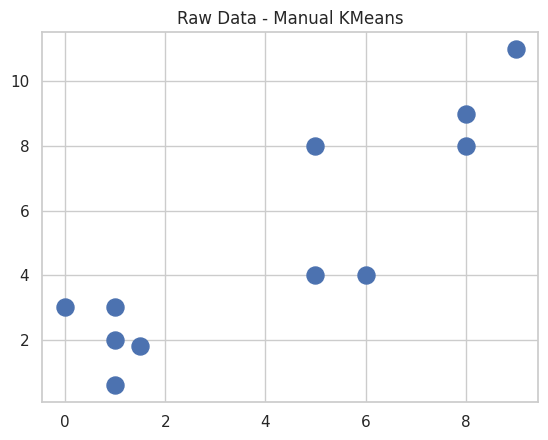

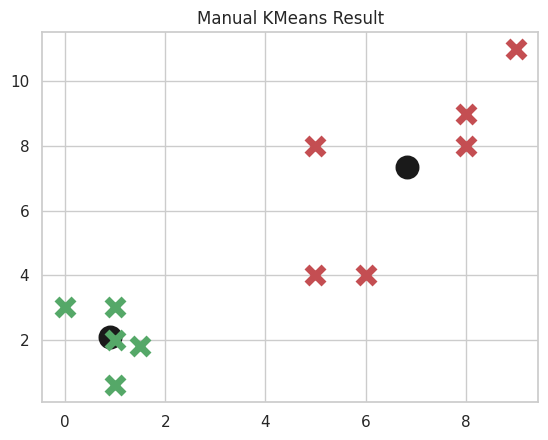


--- sklearn KMeans (2D points) ---


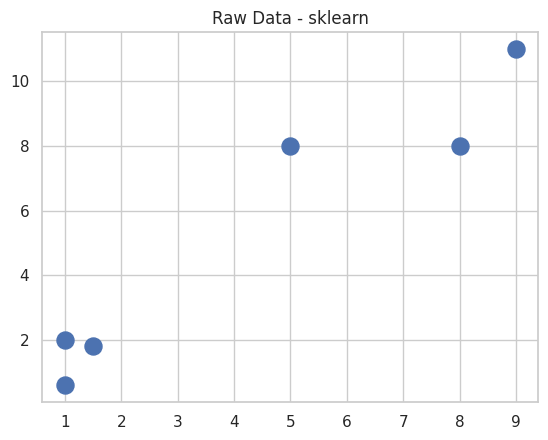

Centroids: [[7.33333333 9.        ]
 [1.16666667 1.46666667]]
Labels: [1 1 0 0 1 0]
Silhouette Score: 0.7479566620911685


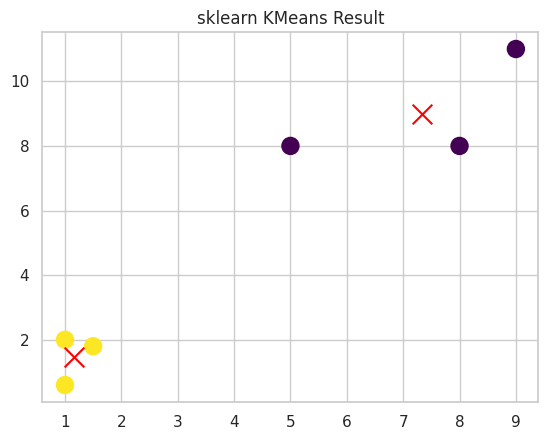


--- Titanic Dataset KMeans ---


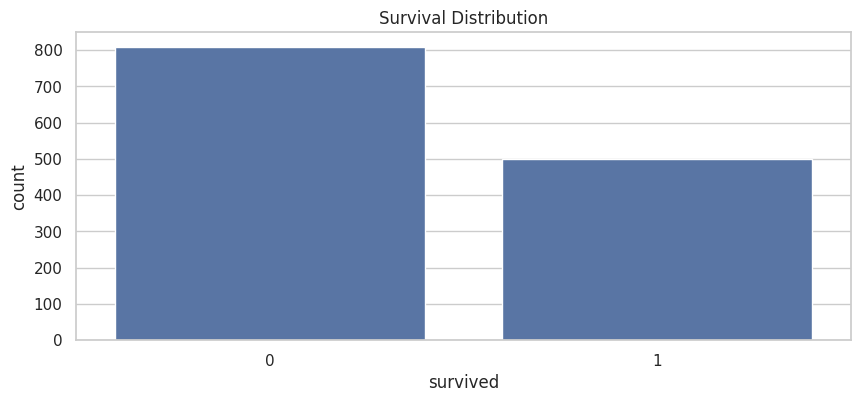

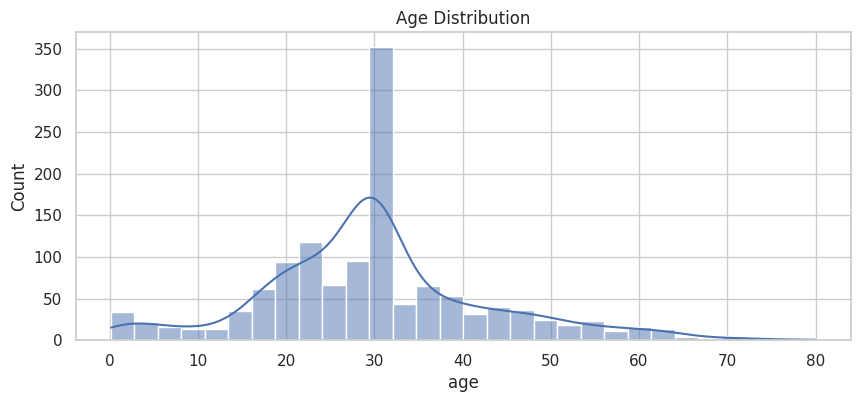

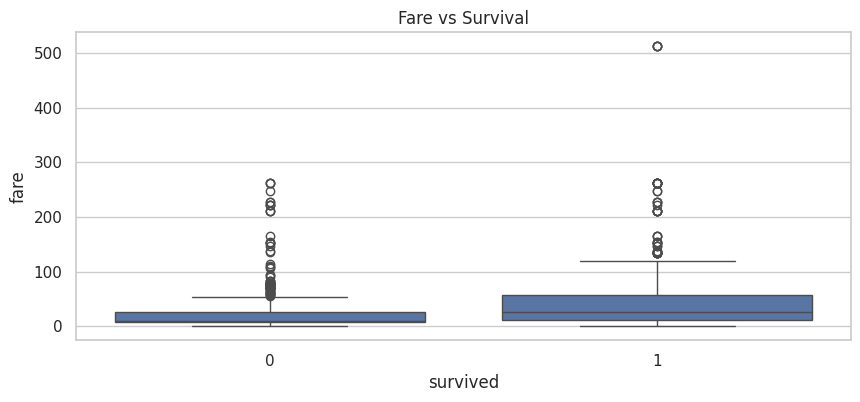

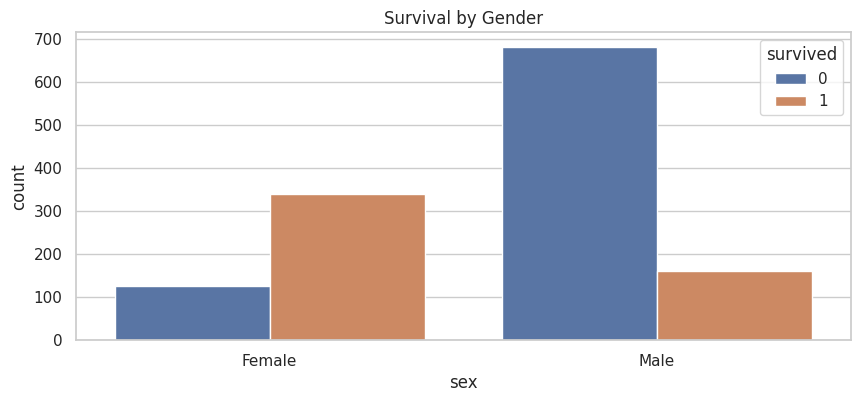

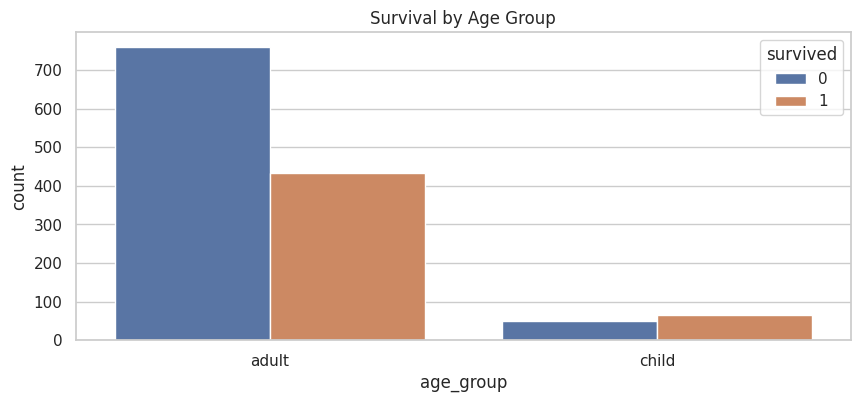


Analysis Insights:
- Females had significantly higher survival rates than males.
- Children under 16 had higher survival rates than adults.
- Passengers who paid higher fares had higher survival chances, possibly indicating higher class.
KMeans Titanic Accuracy (approx): 0.6722689075630253
Silhouette Score: 0.21550061651520994


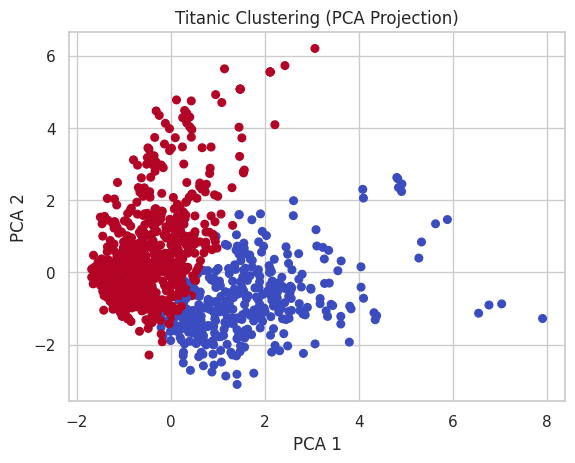

In [5]:

if __name__ == "__main__":
    print("\n--- Manual KMeans ---")
    manual_kmeans()
    print("\n--- sklearn KMeans (2D points) ---")
    sklearn_kmeans_2d()
    print("\n--- Titanic Dataset KMeans ---")
    titanic_kmeans()


# Analysis Insights:
- Females had significantly higher survival rates than males.
- Children under 16 had higher survival rates than adults.
- Passengers who paid higher fares had higher survival chances, possibly indicating higher class.
KMeans Titanic Accuracy (approx): 0.6722689075630253
Silhouette Score: 0.21550061651520994